<h1><b>Model Selection

Ở những bài trước ta đã làm quen và tìm hiểu hầu hết các mô hình Machine Learning rồi, vậy câu hỏi đặt ra: Đối với những bài toán cụ thể thì ta nên chọn **mô hình nào** và chọn **siêu tham số** ra sao.

Thắc mắc đó sẽ được giải quyết trong bài này

Đầu tiên ta sẽ khai báo các thư viện cần thiết và quen thuộc và một vài thư viện lạ lẫm hơn một tí

In [74]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

Tiếp đến là phần đọc file csv `./data/star_classification.csv` và lưu vào biến `df`

In [75]:
### BEGIN SOLUTION
df = pd.read_csv('./data/star_classification.csv')
### END SOLUTION
df.isna().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


Ở đây ta sẽ xem qua mô tả về dữ liệu của ta bằng hàm `describe` của dataframe

In [76]:
### BEGIN SOLUTION
df.describe()
### END SOLUTION

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Sau đó ta xem vài dòng cuối của dữ liệu bằng hàm `tail` của dataframe

In [77]:
### BEGIN SOLUTION
df.tail()
### END SOLUTION

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


Thứ sẽ làm output trong bài hôm nay là cột `class`, ta sẽ xem phân bố của các nhãn trong cột `class` này như thế nào

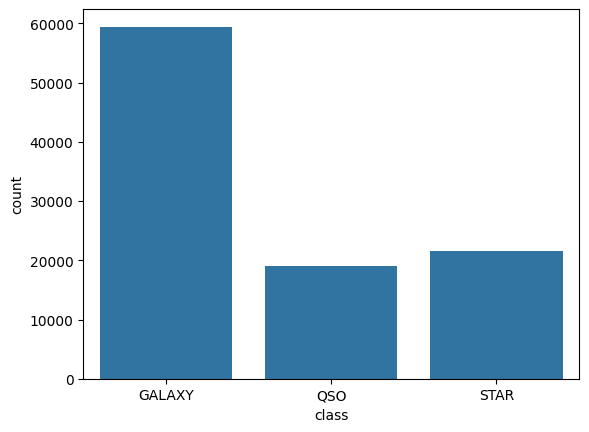

In [78]:
sns.countplot(x=df['class']);

Ta sẽ chuẩn hoá cột `class` này bằng phương pháp Ordinal Encoding
* GALAXY: 1
* QSO: 2
* STAR: 3

In [79]:
### BEGIN SOLUTION
df['class'] = df['class'].map({'GALAXY': 1, 'QSO': 2, 'STAR': 3})
### END SOLUTION

Tiếp đến ta sẽ vẽ heatmap của dữ liệu để xem các đặc trưng có liên quan như thế nào đối với nhau.

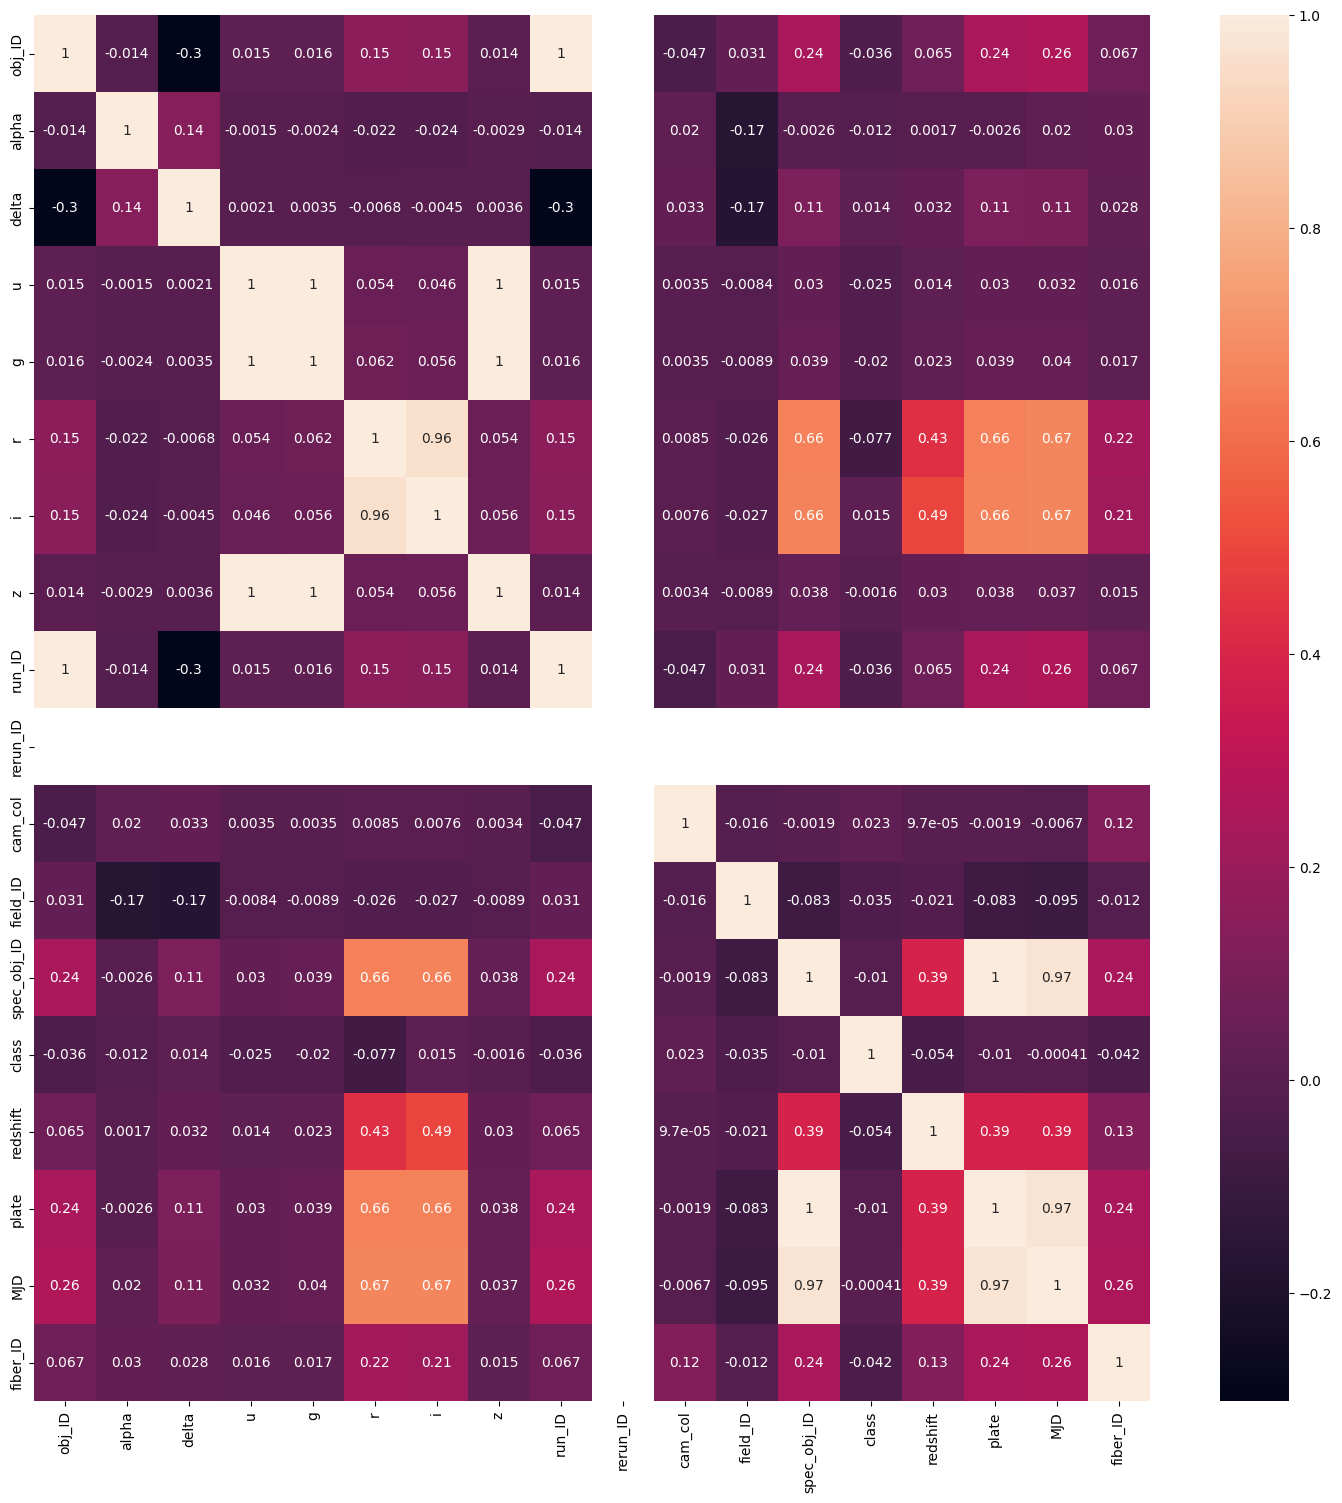

In [80]:
df_corr = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot=True);

Ta thấy có những cột gần như là như nhau và không cần thiết.

Ta sẽ dùng phương thức `drop` của dataframe để xoá chúng khỏi dataframe của chúng ta

Sau đây là danh sách những cột cần xoá trên dataframe `df`:
* rerun_ID
* g
* u
* i
* obj_ID
* MJD
* plate

In [81]:
### BEGIN SOLUTION
df = df.drop(columns=['rerun_ID', 'g', 'u', 'i', 'obj_ID', 'MJD', 'plate'])
### END SOLUTION

Ta sẽ vẽ lại heatmap một lần nữa

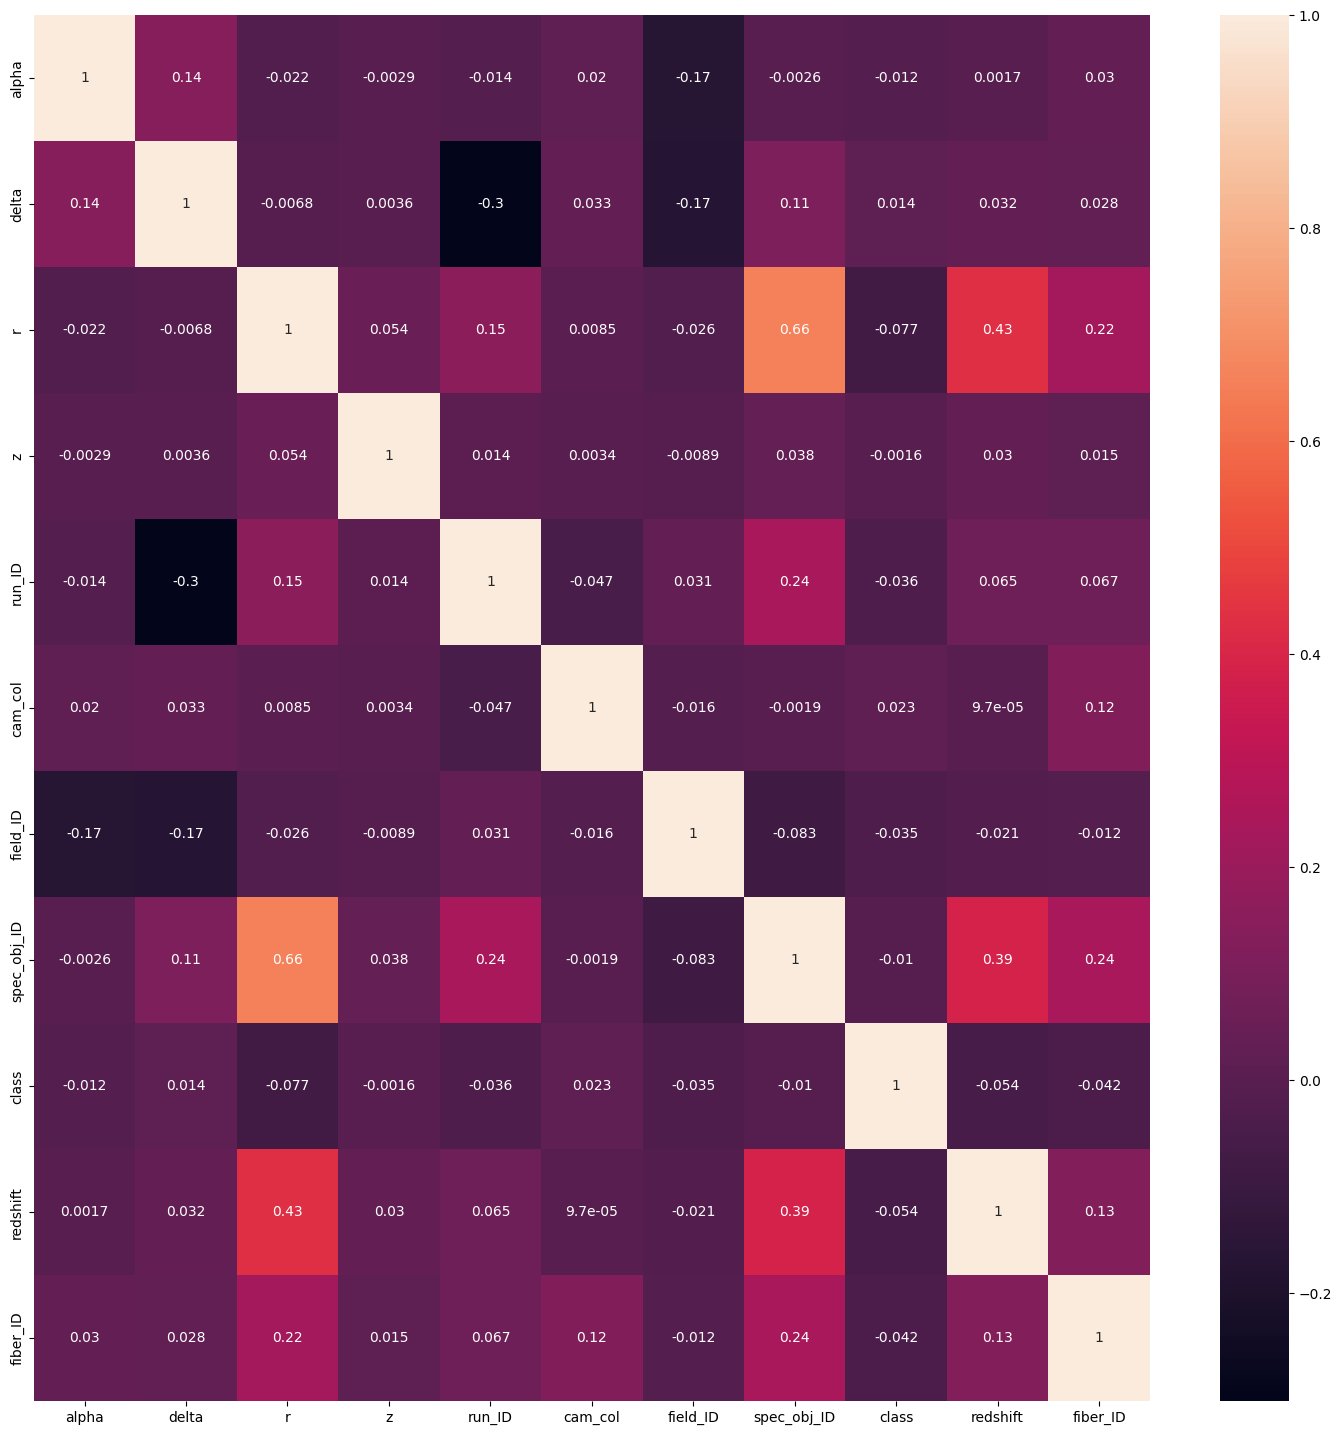

In [82]:
plt.figure(figsize=(18, 18))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True);

Lúc này dữ liệu có vẻ đã ok hơn rất nhiều

Ta tiếp túc chia dữ liệu thành 2 biến `x` và `y`

`y` là cột `class` còn `x` là những cột còn lại

In [83]:
### BEGIN SOLUTION
x = df.drop(columns=['class'])
y = df['class']

### END SOLUTION

Ta thấy ngoại trừ cột cam_col dường như đã được encode sẵn, thì các cột dữ liệu còn lại vẫn chưa được xử lí.

Ta sẽ dùng `StandardScaler` để xử lí các cột dữ liệu còn lại của biến `x` ngoại trừ cột `cam_col`

In [84]:
cols = ['alpha', 'delta', 'r', 'z', 'run_ID', 'field_ID', 'spec_obj_ID', 'redshift', 'fiber_ID']
i = 0
std = StandardScaler()
### BEGIN SOLUTION
for col in cols:
    x[col] = std.fit_transform(x[[col]])


### END SOLUTION
x

,alpha,delta,r,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,fiber_ID
0,-0.434604,0.425529,0.403962,0.003937,-0.445535,2,-0.718947,0.228609,0.079557,-1.021342
1,-0.339921,0.363402,1.584406,0.092835,0.018646,5,-0.450509,1.797912,0.277096,-0.081883
2,-0.367251,0.582713,0.519745,0.008808,-0.445535,2,-0.443798,-0.190037,0.092423,-0.551612
3,1.669523,-1.249105,1.059904,0.018321,-0.147278,3,0.187031,1.358962,0.486770,1.195196
4,1.737310,-0.150242,-1.697421,-0.098468,1.842792,3,-0.329712,0.333328,-0.630267,1.441070
...,...,...,...,...,...,...,...,...,...,...
99995,-1.430113,-1.360650,1.217564,0.065144,1.677886,2,2.649947,1.435146,-0.789186,-0.041515
99996,-1.535053,-0.220744,0.433626,0.023527,1.748632,1,0.690351,0.843101,-0.235069,1.529144
99997,0.486606,-0.429360,-0.777184,-0.041496,0.423785,4,0.817859,-0.803813,-0.592984,-1.377309
99998,0.358952,1.146631,0.144547,-0.001386,-0.423140,4,-0.369978,0.546690,-0.166444,0.075917


Đến đây thì việc preprocessing dữ liệu gần như đã hoàn tất, ta đi đến chủ đề chính của bài hôm nay

Như ở những bài trước có đề cập đến `validation` là quá trình so sánh giữa kết quả `predict` của mô hình và `ground truth`(kết quả thực tế), tính toán độ sai lệch bằng những độ đo như `f1`, `MSE`, .....

Thường ta sẽ dùng `train_test_split` để chia tập train, val và tập test để tính. Nhưng có những bộ dữ liệu mà nó phân bố không đồng đều, hoặc xui rủi ta random dữ liệu khiến cho tập train và val không có những label của tập test, điều này khiến cho kết quả ở tập train và val rất tốt nhưng ở tập test thì không, gọi là **`overfitting`**

Để giải quyết vấn đề này, người ta đã đưa ra một cách gọi là `K Fold Cross Validation`, cách này sẽ chia dữ liệu thành nhiều tập con nhỏ hơn, và những tập con này sẽ thay phiên đóng vai trò là `validation`, những tập còn lại sẽ trở thành tập `train` của mô hình, sau đó ta lấy trung bình của những kết quả đánh giá như `f1`, `MSE`, kết quả này sẽ trực quan hơn và sẽ tránh được hiện tượng overfitting

In [85]:
len(x)

100000

Ta thấy dữ liệu của ta có 100000 dòng, ta sẽ chia thành 10 phần:
* 1: 0 -> 9 999
* 2: 10 000 -> 19 999
.......

* Ta sẽ chia dữ liệu thành x_train, y_train, x_val, y_val
* Sau đó ta `fit` vào mô hình `d_tree`
* Ta tính `f1_score` với `average='macro'` và cộng dồn vào biến `mean_f1_tree`

In [86]:
d_tree = DecisionTreeClassifier()

index = 0
mean_f1_tree = 0
start = time.time()
for i in range(10):
### BEGIN SOLUTION
    x_val = x[index:index + 10000]
    y_val = y[index:index + 10000]
    x_train = x.drop(x_val.index)
    y_train = y.drop(y_val.index)
    d_tree.fit(x_train, y_train)
    y_pred = d_tree.predict(x_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    print(f1)
    mean_f1_tree += f1
### END SOLUTION
    index += 10000
end = time.time()
mean_f1_tree /= 10

time_tree = end - start
print()
mean_f1_tree

0.9531072313752652
0.9541176656933098
0.9525396782185793
0.9544930799627857
0.954614008748505
0.9493037072696358
0.95053344832352
0.9528740987573833
0.9510505176991221
0.9510878380517803



0.9523721274099884

Giống y đoạn code ở trên, nhưng ở đây bạn sẽ tự tạo biến `ran_f` là mô hình `RandomForestClassifier` (`random_state=42`) và code sao cho kết quả là:
* Biến `mean_f1_ran_f`
* Biến `time_ran_f`

In [87]:
### BEGIN SOLUTION
ran_f = RandomForestClassifier(random_state=42)

index = 0
mean_f1_ran_f = 0
start = time.time()
for i in range(10):
    x_val = x[index:index + 10000]
    y_val = y[index:index + 10000]
    x_train = x.drop(x_val.index)
    y_train = y.drop(y_val.index)
    ran_f.fit(x_train, y_train)
    y_pred = ran_f.predict(x_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    print(f1)
    mean_f1_ran_f += f1
    index += 10000
end = time.time()

### END SOLUTION
mean_f1_ran_f /= 10
print()
time_ran_f = end - start
mean_f1_ran_f

0.9721069893104883
0.9720454786503364
0.9688560855063635
0.9700425713998774
0.9715377511536146
0.9687190663756867
0.9707191141677431
0.972247069621245
0.9683789972757904
0.9698614688552515



0.9704514592316397

Giống y đoạn code ở trên, nhưng ở đây bạn sẽ tự tạo biến `lo_r` là mô hình `LogisticRegression` (`max_iter=10000, multi_class='multinomial'`) và code sao cho kết quả là:
* Biến `mean_f1_lo_r`
* Biến `time_lo_r`

In [88]:
### BEGIN SOLUTION
import warnings
warnings.filterwarnings('ignore')
lo_r = LogisticRegression(max_iter=10000, multi_class='multinomial')

index = 0
mean_f1_lo_r = 0
start = time.time()
for i in range(10):
    x_val = x[index:index + 10000]
    y_val = y[index:index + 10000]
    x_train = x.drop(x_val.index)
    y_train = y.drop(y_val.index)
    lo_r.fit(x_train, y_train)
    y_pred = lo_r.predict(x_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    print(f1)
    mean_f1_lo_r += f1
    index += 10000
end = time.time()
### END SOLUTION
mean_f1_lo_r /= 10
print()
time_lo_r = end - start
mean_f1_lo_r

0.9430823754298027
0.9418923540472305
0.93950580537379
0.9414225949643954
0.9443700082047878
0.9422540992057965
0.9404498491901628
0.945206601158982
0.9425149713488131
0.942186257110223



0.9422884916033982

Giống y đoạn code ở trên, nhưng ở đây bạn sẽ tự tạo biến `knc` là mô hình `KNeighborsClassifier` (không truyền vào tham số) và code sao cho kết quả là:
* Biến `mean_f1_knc`
* Biến `time_knc`

In [89]:
### BEGIN SOLUTION

knc = KNeighborsClassifier()

index = 0
mean_f1_knc = 0
start = time.time()
for i in range(10):
    x_val = x[index:index + 10000]
    y_val = y[index:index + 10000]
    x_train = x.drop(x_val.index)
    y_train = y.drop(y_val.index)
    knc.fit(x_train, y_train)
    y_pred = knc.predict(x_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    print(f1)
    mean_f1_knc += f1
    index += 10000
end = time.time()
print()
### END SOLUTION
mean_f1_knc /= 10
time_knc = end - start
mean_f1_knc

0.8298919297932482
0.8467982555283969
0.8466633506993313
0.8395326891708733
0.8397411648227847
0.8603938171746583
0.8495604994639995
0.846417507044887
0.8402215930928576
0.8157360556532431



0.8414956862444279

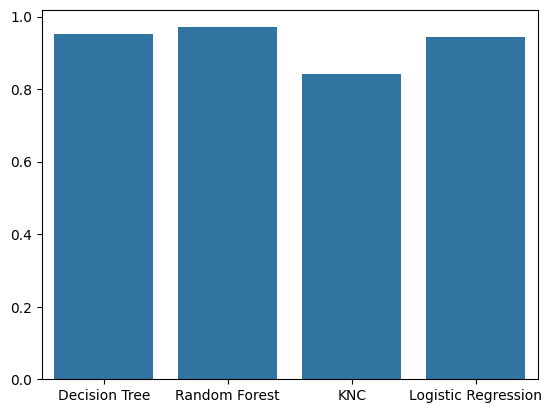

In [90]:
all_f1 = [mean_f1_tree, mean_f1_ran_f, mean_f1_knc, mean_f1_lo_r]
labels = ['Decision Tree', 'Random Forest', 'KNC', 'Logistic Regression']
sns.barplot(x= labels, y=all_f1);

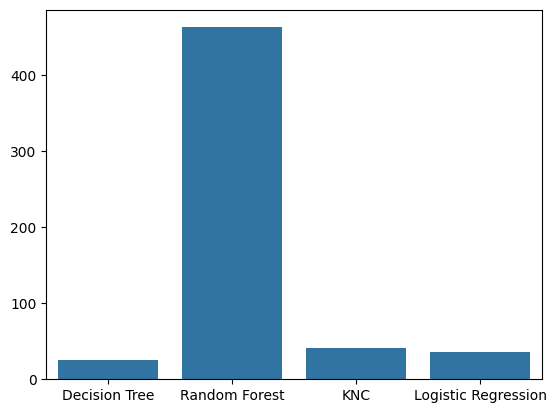

In [91]:
all_time = [time_tree, time_ran_f, time_knc, time_lo_r]
sns.barplot(x= labels, y=all_time);

Ta có thể thấy, đối với tập dữ liệu này thì mô hình `Random Forest` sẽ cho kết quả tốt nhất trong 4 mô hình, nhưng ta phải chịu đánh đổi về mặt thời gian là rất lớn.

Còn mô hinh `Decision Tree`, mặc dù kết quả chỉ thấp hơn một chút so với mô hình `Random Forest` (0.95 < 0.97) nhưng bù lại thòi gian chạy là ít tốn chi phí nhất trong 4 mô hình.

Nên nếu có nhiều thời gian, ta sẽ chọn mô hình `Random Forest` để nâng cao chất lượng output

Ta có thể thấy ở mô hình `LogisticRegression` ta đã chọn 2 siêu tham số đó là `max_iter=10000` và `multi_class=multinomial`

Vậy câu hỏi đặt ra là làm sao để biết được 2 siêu tham số này bao nhiêu sẽ là tối ưu nhất đối với tập dữ liệu này, và còn những siêu tham số khác sẽ là bao nhiêu.

Để giải quyết vấn đề này, ta sẽ dùng `Validation curves`, `GridSearchCV`, `RandomSearchCV`

Đầu tiên là **`Validation curves`**

`Validation curves` cho phép ta tìm một siêu tham số cụ thể tốt nhất trong khoảng cho trước đối với mô hình

Ta sẽ thử nghiệm với siêu tham số `n_estimators` của mô hình `RandomForest`, tham số này mặc định sẽ là 100

Đầu tiên ta sẽ khai báo các giá trị có thể có của tham số này là: 10, 50, 100 và lưu vào biến `val_c`

In [92]:
### BEGIN SOLUTION
val_c = [10, 50, 100]
### END SOLUTION

Sau đó ta dùng `from sklearn.model_selection import validation_curve` để khai báo validation curve

Ta tạo một đối tượng `validation_curve` truyền vào mô hình `RandomForestClassifier(random_state=42)`, `x`, `y`, `param_name='n_estimators`, `param_range=val_c`, `cv=5` đối tượng này sẽ trả về 2 tập giá trị:
* Điểm số trên tập train
* Điểm số trên tập test

Vì thế ta phải gán đối tượng này cho 2 biến `train_score`, `test_score`

Ta gán `cv=5` tức là mô hình sẽ giống như `5-Fold Cross Validation`

In [93]:
### BEGIN SOLUTION
from sklearn.model_selection import validation_curve
ran_f = RandomForestClassifier(random_state=42)
train_score, test_score = validation_curve(ran_f, x, y, param_name='n_estimators', param_range=val_c, cv=5)
### END SOLUTION

In [94]:
assert train_score.shape == (3, 5)
assert test_score.shape == (3, 5)

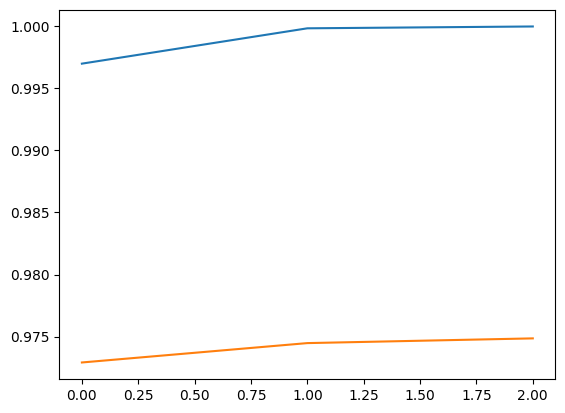

In [95]:
plt.plot(np.mean(train_score, axis=1), linestyle='-')
plt.plot(np.mean(test_score, axis=1), linestyle='-')
plt.show();

Ta thấy cả trên tập train và test thì `n_estimators`=100 sẽ cho kết quả tốt nhất trong 3 giá trị, cho nên ta sẽ chọn 100

Phương pháp hyper parameter tunning này thì hiệu quả nhưng nó có một bất cập đó chính là ta không thể tìm nhiều tham số 1 lượt được

Có tình trạng xảy ra đó chính là đối với tham số này ví dụ ở đây là `n_estimators=100` là tối ưu đối với tham số này nhưng khi nhiều tham số kết hợp lại thì nó không tối ưu bằng `n_estimators=60`, ví dụ thế

Cho nên ta sẽ đến những phương pháp multi hyper parameter tunning

Đầu tiên là `Grid Search`

`GridSearch` tức là ta sẽ vét cạn hay nói cách khác là thử hết tất cả các trường hợp mà ta nghĩ là có thể xảy ra với mô hình.

Cách này thường là sẽ tốn kém chi phí tính toán nhất, nhưng nó sẽ đảm bảo được độ chính xác và độ tương đồng trong những lần chạy tiếp theo.

Đầu tiên ta sẽ tạo biến `search_space` là một dict các siêu tham số và giá trị có thể nhận được của chúng

* multi_class: ovr, multinomial
* C: 0.1, 5, 10, 20

In [96]:
### BEGIN SOLUTION
search_space = {
    'multi_class': ['ovr', 'multinomial'],
    'C': [0.1, 5, 10, 20]
}
### END SOLUTION

Tiếp đến ta cần import `GridSearchCV` bằng `from sklearn.model_selection import GridSearchCV`

Ta sẽ tạo biến `GS` là một đối tượng `GridSearchCV` và truyền vào:
* estimator: lo_r (mô hình LogisticRegression ở trên)
* param_grid: search_space

Sau đó ta sử dụng phương thức `fit` của `GS` để fit `x` và `y` vào mô hình GridSearch này

In [97]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(lo_r, search_space)
GS.fit(x, y)
### END SOLUTION

GridSearchCV(estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.1, 5, 10, 20],
                         'multi_class': ['ovr', 'multinomial']})

Sau khi chạy xong cell ở trên, ta có thể xem bộ siêu tham số tốt nhất mà mô hình `GS` đã tìm ra bằng thuộc tính `best_estimator_` của `GS`

In [98]:
### BEGIN SOLUTION
GS.best_estimator_
### END SOLUTION

LogisticRegression(C=20, max_iter=10000, multi_class='multinomial')

In [99]:
pd.DataFrame(GS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.294168,0.552759,0.007422,0.003729,0.1,ovr,"{'C': 0.1, 'multi_class': 'ovr'}",0.94335,0.93570,0.94515,0.93390,0.93645,0.93891,0.004475,8
1,2.895867,0.991486,0.010698,0.007828,0.1,multinomial,"{'C': 0.1, 'multi_class': 'multinomial'}",0.94495,0.94405,0.94700,0.94560,0.94550,0.94542,0.000963,7
2,0.664988,0.073181,0.005545,0.000171,5.0,ovr,"{'C': 5, 'multi_class': 'ovr'}",0.95440,0.95200,0.95445,0.93545,0.95320,0.94990,0.007281,6
3,3.096916,0.868993,0.007580,0.003470,5.0,multinomial,"{'C': 5, 'multi_class': 'multinomial'}",0.95370,0.95215,0.95360,0.95580,0.95400,0.95385,0.001166,3
4,0.674945,0.066093,0.008144,0.003290,10.0,ovr,"{'C': 10, 'multi_class': 'ovr'}",0.95465,0.95270,0.95480,0.93640,0.95380,0.95047,0.007075,5
5,3.384079,0.899120,0.007485,0.003033,10.0,multinomial,"{'C': 10, 'multi_class': 'multinomial'}",0.95440,0.95290,0.95465,0.95615,0.95470,0.95456,0.001033,2
6,0.842894,0.365454,0.006070,0.001117,20.0,ovr,"{'C': 20, 'multi_class': 'ovr'}",0.95500,0.95325,0.95545,0.93640,0.95415,0.95085,0.007264,4
7,3.667991,1.098246,0.008155,0.005328,20.0,multinomial,"{'C': 20, 'multi_class': 'multinomial'}",0.95480,0.95370,0.95530,0.95690,0.95560,0.95526,0.001044,1


Trên là báo cáo về những lần chạy của mô hình `GS`, ta có thể thấy có tổng cộng 8 lần chạy tương ứng với (2*4, 2 của `multi_class` và 4 của `C`)

và bộ siêu tham số tốt nhất là `C: 20` và `multi_class: 'multinomial'`

Ta sẽ dùng bộ siêu tham số này xem mô hình cải thiện thế nào. (Ta có thể copy đoạn code ở trên và thay đổi siêu tham số, ta có thể để siêu tham số max_iter=10000 để chắc chắn là mô hình sẽ hội tụ tốt và đánh đổi chi phí thời gian)

In [100]:
### BEGIN SOLUTION
import warnings
warnings.filterwarnings('ignore')
lo_r = LogisticRegression(C=20, max_iter=10000, multi_class='multinomial')

index = 0
mean_f1_lo_r = 0
start = time.time()
for i in range(10):
### BEGIN SOLUTION
    x_val = x[index:index + 10000]
    y_val = y[index:index + 10000]
    x_train = x.drop(x_val.index)
    y_train = y.drop(y_val.index)
    lo_r.fit(x_train, y_train)
    y_pred = lo_r.predict(x_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    print(f1)
    mean_f1_lo_r += f1
    index += 10000
end = time.time()
### END SOLUTION
mean_f1_lo_r /= 10
print()
time_lo_r = end - start
mean_f1_lo_r

0.9477979031041616
0.9471789310125501
0.9450474445819158
0.9450225834569254
0.9484396813657305
0.9458325035093456
0.9478510063138006
0.950423676706731
0.9470590003136742
0.9468618513543099



0.9471514581719145

Ta có thể thấy `mean_f1` đã tăng từ **0.9423** lên **0.9471**

Ta sẽ tiếp tục đi đến một cách chọn siêu tham số khác đó là `RandomSearchCV`

RandomSearch sẽ lấy ngẫu nhiên các bộ siêu tham số có thể được tạo ra và ta sẽ phải giới hạn số lần lặp của mô hình, nếu số lần lặp của mô hình lớn hơn số cách chọn siêu tham số quá nhiều thì mô hình này sẽ trở thành GridSearch và còn tệ hơn GridSearch vì mô hình sẽ mất nhiều chi phí tính toán hơn

Đầu tiên ta sẽ tạo biến `ran_search_space` là biến dict với các giá trị giống như `search_space`

In [101]:
### BEGIN SOLUTION
ran_search_space = {
    'multi_class': ['ovr', 'multinomial'],
    'C': [0.1, 5, 10, 20]
}
### END SOLUTION

Sau đó ta sẽ dùng `from sklearn.model_selection import RandomizedSearchCV` để khai báo RandomSearchCV

Ta tạo biến `RS` là một đối tượng `RandomizedSearch_CV`, truyền vào:
* estimator=lo_r
* param_distributions=ran_search_space
* n_iter=6 **Ta sẽ giới hạn 6 lần lặp cho mô hình này**

Sau đó ta dùng phương thức `fit` của `RS` để fit `x` và `y` cho mô hình

In [102]:
### BEGIN SOLUTION
from sklearn.model_selection import RandomizedSearchCV
RS = RandomizedSearchCV(lo_r, ran_search_space, n_iter=6)
RS.fit(x, y)

### END SOLUTION

RandomizedSearchCV(estimator=LogisticRegression(C=20, max_iter=10000,
                                                multi_class='multinomial'),
                   n_iter=6,
                   param_distributions={'C': [0.1, 5, 10, 20],
                                        'multi_class': ['ovr', 'multinomial']})

Ta sẽ dùng thuộc tính `best_estimator_` của `RS` để xem bộ siêu tham số tốt nhất mà mô hình này đã tìm ra

In [103]:
### BEGIN SOLUTION
RS.best_estimator_
### END SOLUTION

LogisticRegression(C=20, max_iter=10000, multi_class='multinomial')

In [104]:
pd.DataFrame(RS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.678503,0.053542,0.005743,0.000184,ovr,20.0,"{'multi_class': 'ovr', 'C': 20}",0.95500,0.95325,0.95545,0.93640,0.95415,0.95085,0.007264,4
1,3.717381,0.640803,0.007604,0.002441,multinomial,20.0,"{'multi_class': 'multinomial', 'C': 20}",0.95480,0.95370,0.95530,0.95690,0.95560,0.95526,0.001044,1
2,3.355269,0.828013,0.008225,0.004290,multinomial,5.0,"{'multi_class': 'multinomial', 'C': 5}",0.95370,0.95215,0.95360,0.95580,0.95400,0.95385,0.001166,3
3,2.149167,0.539276,0.005380,0.000108,multinomial,0.1,"{'multi_class': 'multinomial', 'C': 0.1}",0.94495,0.94405,0.94700,0.94560,0.94550,0.94542,0.000963,6
4,3.285401,0.416831,0.008859,0.003365,multinomial,10.0,"{'multi_class': 'multinomial', 'C': 10}",0.95440,0.95290,0.95465,0.95615,0.95470,0.95456,0.001033,2
5,1.328152,0.381301,0.011614,0.005964,ovr,5.0,"{'multi_class': 'ovr', 'C': 5}",0.95440,0.95200,0.95445,0.93545,0.95320,0.94990,0.007281,5


Ta có thể thấy ở đây có 6 lần lặp và may mắn lần lặp đầu tiên mô hình đã tìm ra bộ siêu tham số tốt nhất như mô hình `GS` đã tìm ra trước đó